In [ ]:
!wget https://raw.githubusercontent.com/Balagopal-datascientist/Data_sets/master/heart_failure_clinical_records_dataset.csv

--2021-09-28 11:49:59--  https://raw.githubusercontent.com/Balagopal-datascientist/Data_sets/master/heart_failure_clinical_records_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [text/plain]
Saving to: ‘heart_failure_clinical_records_dataset.csv.3’

heart_failure_clini 100%[===================>]  11.95K  --.-KB/s    in 0s      

2021-09-28 11:49:59 (96.2 MB/s) - ‘heart_failure_clinical_records_dataset.csv.3’ saved [12239/12239]



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_df.shape

(299, 13)

In [ ]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#sns.pairplot(heart_df, hue="DEATH_EVENT")

In [ ]:
"""numerical_features = [features for features in heart_df.columns if heart_df[features].dtype!='O']

print('Length of numerical features',len(numerical_features))

heart_df[numerical_features]"""

"numerical_features = [features for features in heart_df.columns if heart_df[features].dtype!='O']\n\nprint('Length of numerical features',len(numerical_features))\n\nheart_df[numerical_features]"

In [ ]:
categorical = pd.DataFrame(zip(heart_df.anaemia,heart_df.diabetes,heart_df.high_blood_pressure,heart_df.sex,heart_df.smoking))
categorical

,0,1,2,3,4
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0
...,...,...,...,...,...
294,0,1,1,1,1
295,0,0,0,0,0
296,0,1,0,0,0
297,0,0,0,1,1


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
y = heart_df.iloc[:,-1]

In [ ]:
x = heart_df.iloc[:,:-1]

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(categorical, y)
results=fit.scores_

In [ ]:
"""col_array=[]
for col in x.columns:
  col_array.append(col)"""

'col_array=[]\nfor col in x.columns:\n  col_array.append(col)'

In [ ]:
col_array= ["anaemia","diabetes","high_blood_preassure","sex","smoking"]

In [ ]:
chi_res=pd.DataFrame(results,col_array)

In [ ]:
chi_res

,0
anaemia,0.746593
diabetes,0.000657
high_blood_preassure,1.221539
sex,0.001956
smoking,0.032347


In [ ]:
header2= ["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]
header3=["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time","DEATH_EVENT"]
#numerical_features = pd.DataFrame(zip(heart_df.age,heart_df.creatinine_phosphokinase,heart_df.ejection_fraction,heart_df.serum_creatinine,heart_df.serum_sodium,heart_df.time))

In [ ]:
"""numerical_features.rename(columns = {'0':'age', '1':'creatinine_phosphokinase',
                              '2':'ejection_fraction',
                              '3':'serum_creatinine',
                          '4':'serum_sodium',
                          '5':'time'}, inplace = True)"""

"numerical_features.rename(columns = {'0':'age', '1':'creatinine_phosphokinase',\n                              '2':'ejection_fraction',\n                              '3':'serum_creatinine',\n                          '4':'serum_sodium',\n                          '5':'time'}, inplace = True)"

In [ ]:
numerical_features=pd.concat((heart_df.age,heart_df.creatinine_phosphokinase,heart_df.ejection_fraction,heart_df.serum_creatinine,heart_df.serum_sodium,heart_df.time),keys=header2,axis=1)

In [ ]:
numerical_features

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,75.0,582,20,1.9,130,4
1,55.0,7861,38,1.1,136,6
2,65.0,146,20,1.3,129,7
3,50.0,111,20,1.9,137,7
4,65.0,160,20,2.7,116,8
...,...,...,...,...,...,...
294,62.0,61,38,1.1,143,270
295,55.0,1820,38,1.2,139,271
296,45.0,2060,60,0.8,138,278
297,45.0,2413,38,1.4,140,280


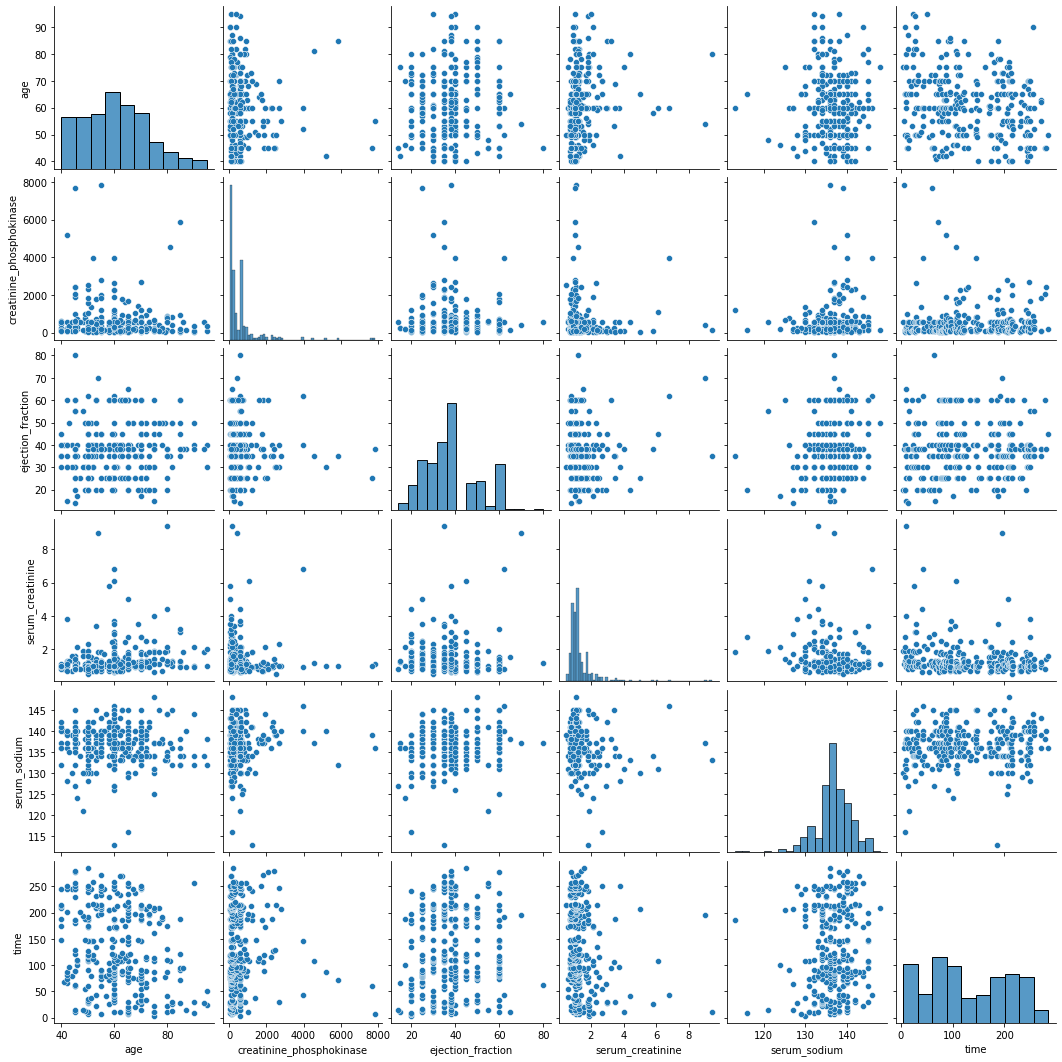

In [ ]:
sns.pairplot(numerical_features)

In [ ]:
numericalx=numerical_features=pd.concat((heart_df.age,heart_df.creatinine_phosphokinase,heart_df.ejection_fraction,heart_df.serum_creatinine,heart_df.serum_sodium,heart_df.time,heart_df.DEATH_EVENT),keys=header3,axis=1)

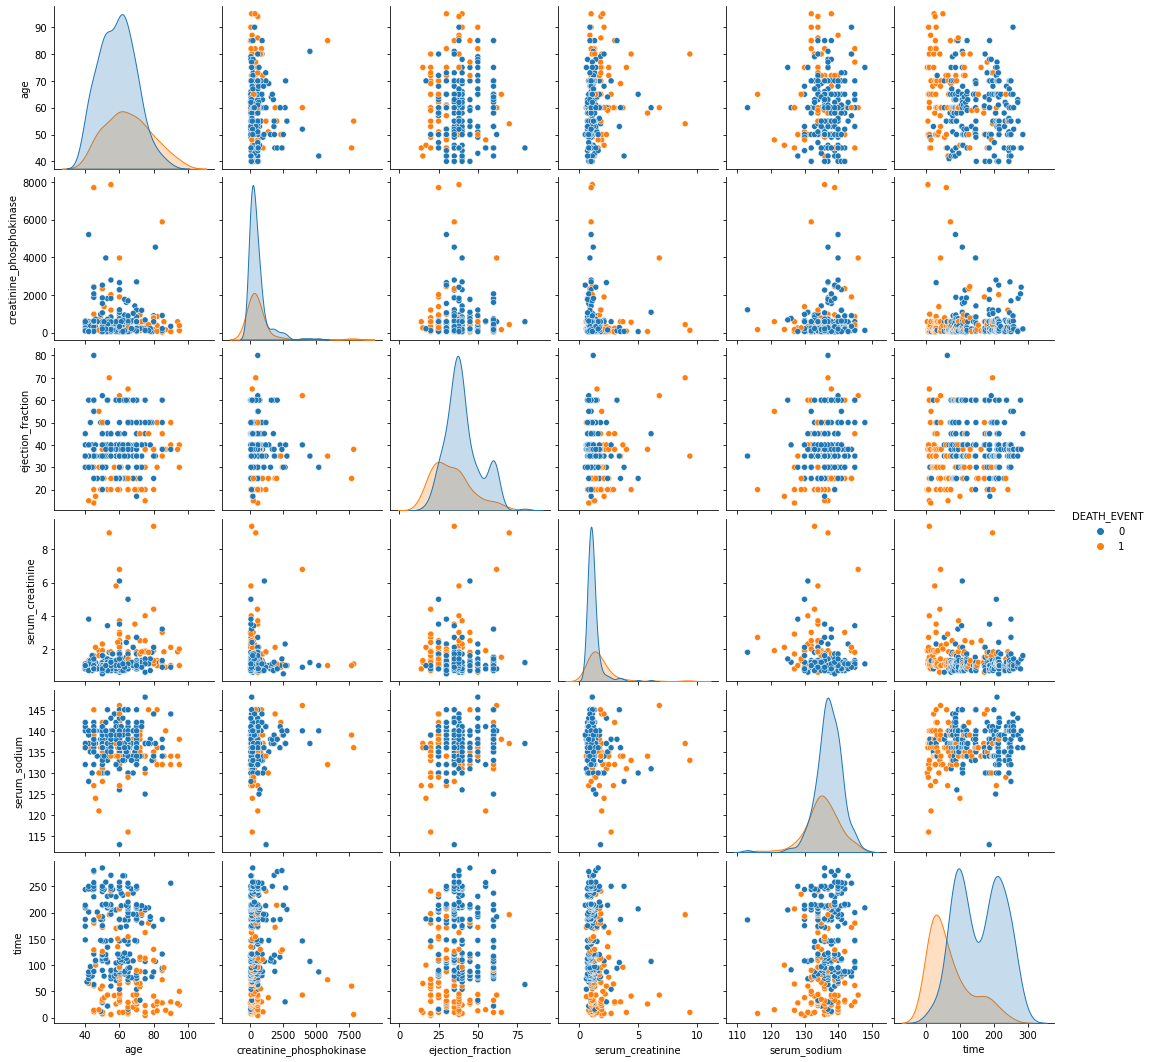

In [ ]:
sns.pairplot(numericalx,hue="DEATH_EVENT")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c0ea4cf50>,
      dtype=object)

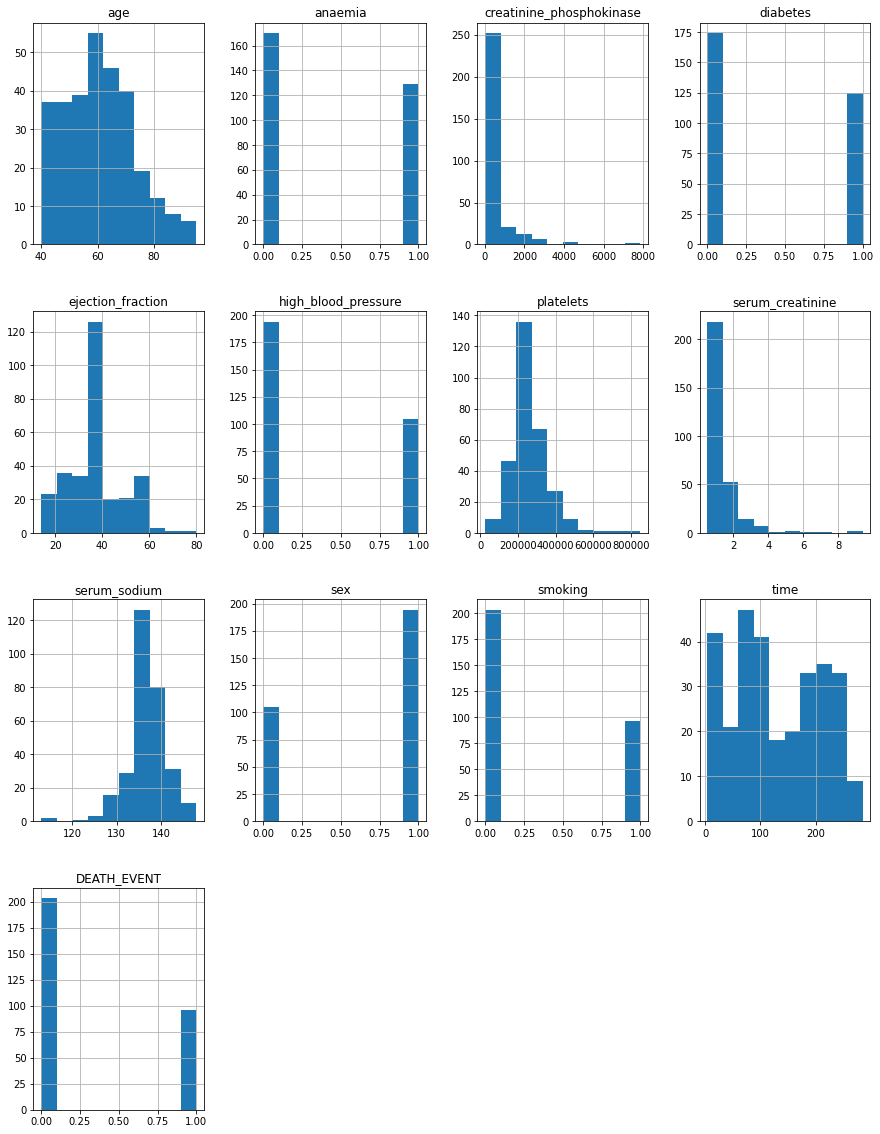

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_df.hist(ax=ax)
  

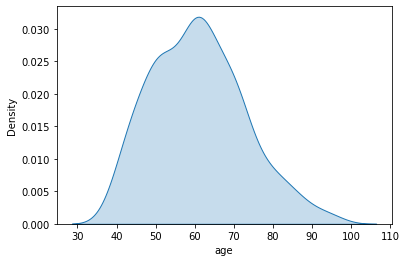

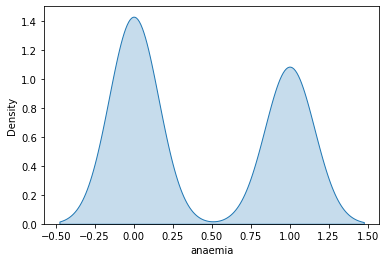

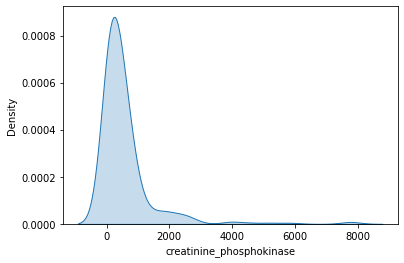

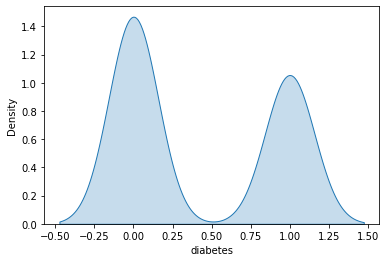

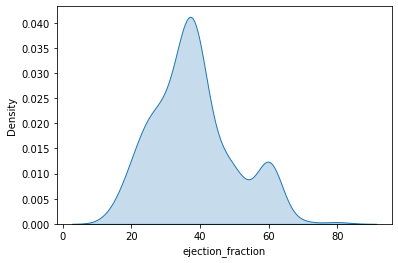

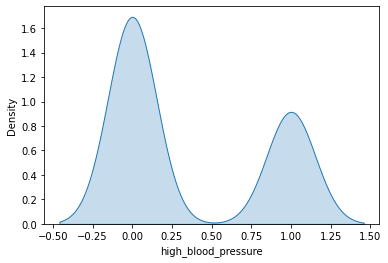

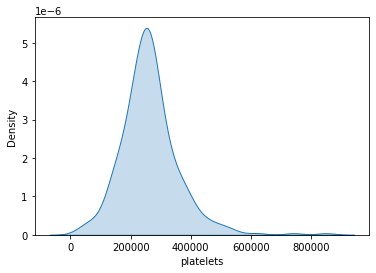

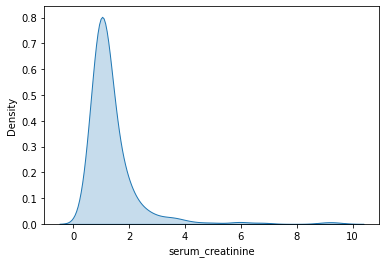

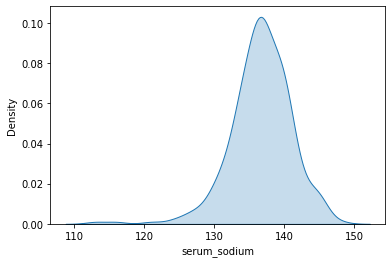

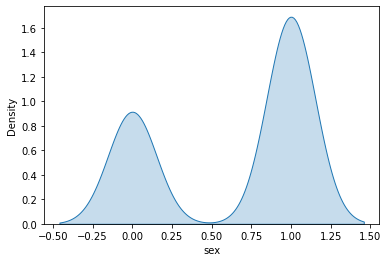

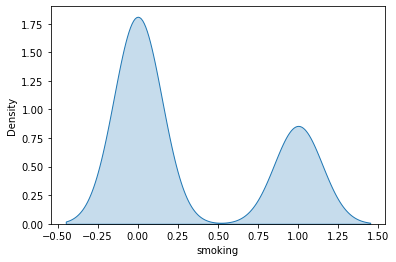

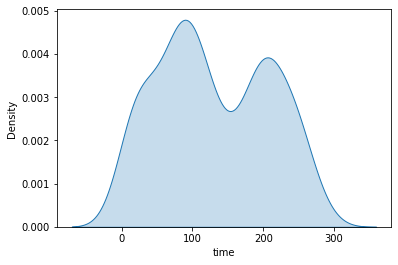

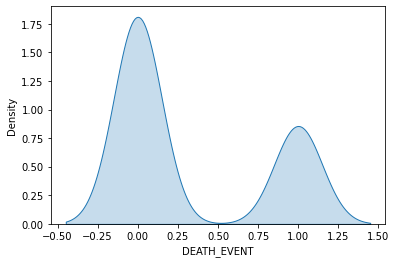

In [ ]:
i=1
for col in heart_df.columns:
  plt.figure(i)
  sns.kdeplot(heart_df[col],shade=True)
  i+=1



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
svc_pipeline = Pipeline([('std',StandardScaler()),
                         ('svc',SVC())])
svc_pipeline.fit(x_train,y_train)
y_svc_pred=svc_pipeline.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_svc_pred)
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.53      0.50      0.51        20

    accuracy                           0.68        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.68      0.68      0.68        60



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_svc_pred)

0.6833333333333333

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_pipeline = Pipeline([('std',StandardScaler()),
                         ('rnd',RandomForestClassifier(n_estimators=500,bootstrap=True))])

randomforest_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rnd',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_rand_pred=randomforest_pipeline.predict(x_test)
confusion_matrix(y_test,y_rand_pred)
print(classification_report(y_test,y_rand_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.68      0.65      0.67        20

    accuracy                           0.78        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.78      0.78      0.78        60



In [ ]:
accuracy_score(y_test,y_rand_pred)

0.7833333333333333

In [ ]:
from sklearn.cluster import KMeans
pipe_kmeans_std_rand = Pipeline([('std',StandardScaler()),
                                 ('kmeans',KMeans(n_clusters=50)),
                                 ("rand",RandomForestClassifier(n_estimators=500,bootstrap=True))])
pipe_kmeans_std_rand.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('rand',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                      

In [ ]:
y_pred_km_sd=pipe_kmeans_std_rand.predict(x_test)



In [ ]:
confusion_matrix(y_test,y_pred_km_sd)
print(classification_report(y_test,y_pred_km_sd))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.50      0.50      0.50        20

    accuracy                           0.67        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.67      0.67      0.67        60



In [ ]:
accuracy_score(y_test,y_pred_km_sd)

0.6666666666666666

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
pipe_smo_std_rnd = Pipeline([('smote',SMOTE(sampling_strategy='minority')),
                             ('std',StandardScaler()),
                             ("rand",RandomForestClassifier(n_estimators=500,bootstrap=True))])
pipe_smo_std_rnd.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='minority',
                       svm_estimator='deprecated')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rand',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
           

In [ ]:
y_pred_smo_std_rnd=pipe_smo_std_rnd.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_smo_std_rnd)
print(classification_report(y_test,y_pred_smo_std_rnd))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.70      0.70      0.70        20

    accuracy                           0.80        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.80      0.80      0.80        60



In [ ]:
pipe_smo_std_svc = Pipeline([('smote',SMOTE(sampling_strategy='minority')),
                             ('std',StandardScaler()),
                             ("svc",SVC())])
pipe_smo_std_svc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='minority',
                       svm_estimator='deprecated')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_pred_smo_std_svc=pipe_smo_std_svc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_smo_std_svc))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        40
           1       0.52      0.60      0.56        20

    accuracy                           0.68        60
   macro avg       0.65      0.66      0.66        60
weighted avg       0.70      0.68      0.69        60



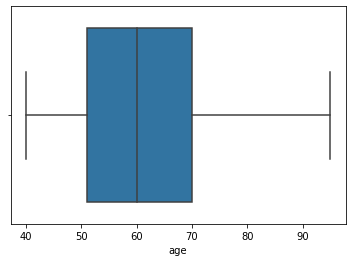

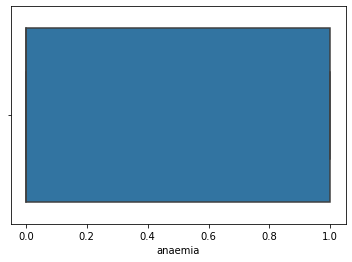

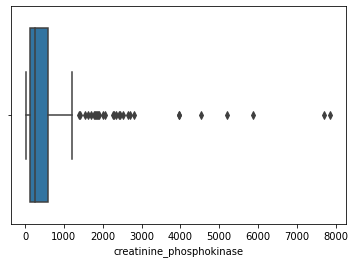

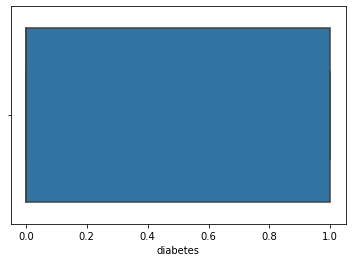

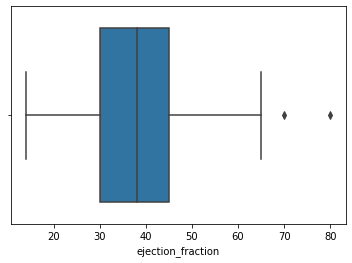

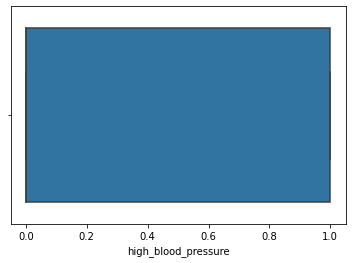

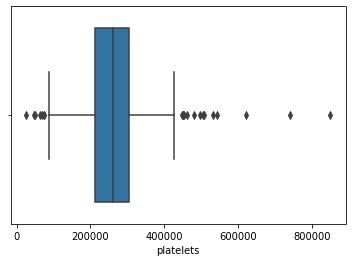

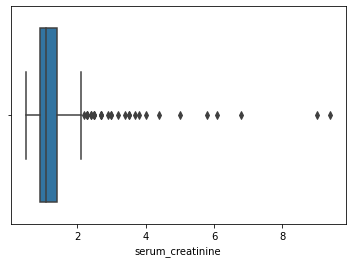

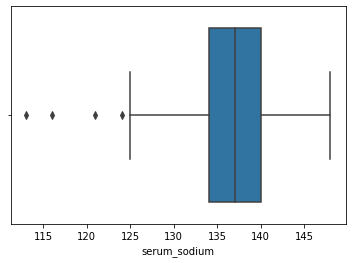

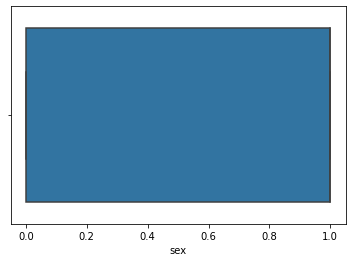

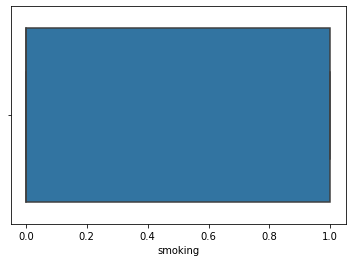

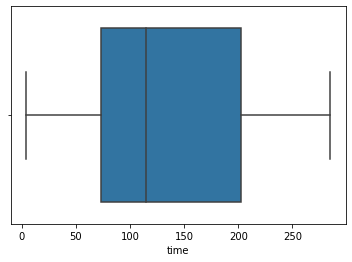

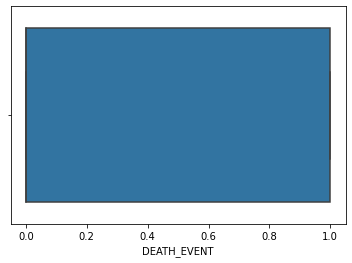

In [ ]:
i=1
for col in heart_df.columns:
  plt.figure(i)
  sns.boxplot(x=heart_df[col])
  i+=1

In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(heart_df))

In [ ]:
z

array([[1.19294523e+00, 8.71104775e-01, 1.65728387e-04, ...,
        6.87681906e-01, 1.62950241e+00, 1.45416070e+00],
       [4.91279276e-01, 8.71104775e-01, 7.51463953e+00, ...,
        6.87681906e-01, 1.60369074e+00, 1.45416070e+00],
       [3.50832977e-01, 8.71104775e-01, 4.49938761e-01, ...,
        1.45416070e+00, 1.59078490e+00, 1.45416070e+00],
       ...,
       [1.33339153e+00, 8.71104775e-01, 1.52597865e+00, ...,
        6.87681906e-01, 1.90669738e+00, 6.87681906e-01],
       [1.33339153e+00, 8.71104775e-01, 1.89039811e+00, ...,
        1.45416070e+00, 1.93250906e+00, 6.87681906e-01],
       [9.12335403e-01, 8.71104775e-01, 3.98321274e-01, ...,
        1.45416070e+00, 1.99703825e+00, 6.87681906e-01]])

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296]), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6]))


In [ ]:
heart_df = heart_df[(z<3).all(axis=1)]

In [ ]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.972621,0.435714,456.725000,0.417857,37.835714,0.360714,258820.066536,1.275393,136.825000,0.653571,0.314286,132.696429,0.307143
std,11.815337,0.496738,537.107566,0.494089,11.470461,0.481068,85605.349916,0.615743,3.924203,0.476684,0.465062,77.183559,0.462135
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,114.500000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,239.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,205.250000,1.000000
max,95.000000,1.000000,2794.000000,1.000000,65.000000,1.000000,543000.000000,4.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
y = heart_df.iloc[:,-1]

In [ ]:
x = heart_df.iloc[:,:-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
svc_pipeline = Pipeline([('std',StandardScaler()),
                         ('svc',SVC())])
svc_pipeline.fit(x_train,y_train)
y_svc_pred=svc_pipeline.predict(x_test)


In [ ]:
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        32
           1       0.75      0.50      0.60        24

    accuracy                           0.71        56
   macro avg       0.72      0.69      0.69        56
weighted avg       0.72      0.71      0.70        56



In [ ]:
randomforest_pipeline = Pipeline([('std',StandardScaler()),
                         ('rnd',RandomForestClassifier(n_estimators=50,bootstrap=True))])

randomforest_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rnd',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_rand_pred=randomforest_pipeline.predict(x_test)

print(classification_report(y_test,y_rand_pred))
print(confusion_matrix(y_test,y_rand_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.79      0.79      0.79        24

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56

[[27  5]
 [ 5 19]]


In [ ]:
pipe_smo_std_rnd = Pipeline([('smote',SMOTE(sampling_strategy='minority')),
                             ('std',StandardScaler()),
                             ("rand",RandomForestClassifier(n_estimators=100,bootstrap=True))])
pipe_smo_std_rnd.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='minority',
                       svm_estimator='deprecated')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rand',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
           

In [ ]:
y_pred_smo_std_svc=pipe_smo_std_svc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_smo_std_svc))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.91      0.88      0.89        24

    accuracy                           0.91        56
   macro avg       0.91      0.91      0.91        56
weighted avg       0.91      0.91      0.91        56



In [ ]:
confusion_matrix(y_test,y_pred_smo_std_svc)

array([[30,  2],
       [ 3, 21]])